In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df = pd.DataFrame(diabetes.data, columns = ['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
diabetes.target.shape

(442,)

# (1)데이터 가져오기

In [8]:
df_X = diabetes.data
df_y = diabetes.target

# (2)모델에 입력할 데이터 X 준비하기

# (3)모델에 입력할 데이터 y 준비하기

# (4)train데이터와 test데이터로 분리하기

In [9]:
# x와 y데이터를 각각train데이터와 test데이터로 분리해주세요
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# (5)모델준비하기

In [10]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해 주세요
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W,b

(array([0.12155468, 0.85300119, 0.43981265, 0.77050776, 0.83668321,
        0.56856291, 0.93193944, 0.24654045, 0.5342811 , 0.29703689]),
 0.7015776905315454)

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# (6)손실함수 loss정의하기

In [12]:
# 손실함수를 MSE 함수로 정의해주세요
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# (7)기울기를 구하는 gradient함수 구현하기

In [13]:
# 기울기를 계산하는 gradient함수를 구현해주세요.
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# (8)하이퍼 파라미터인 학습률 설정하기

In [14]:
# 학습률,learning rate를 설정해 주세요
LEARNING_RATE = 0.6
# 만약 학습이 잘 되지 않는다면 learning rate값을 여러가지로 설정하며 실험해보세요

# (9)모델 학습하기

In [15]:
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요
# loss값이 충분히 떨어질때가지 학습을 진행해 주세요
# 입력하는 데이터인 x에 들어가는 특성 컬럼들을 몇개 빼도 괜찮습니다. 다양한데이터로 실험해보세요
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W = W - (LEARNING_RATE * dW)
    b = b - (LEARNING_RATE * db)
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2894.7896
Iteration 200 : Loss 2890.5160
Iteration 300 : Loss 2886.9451
Iteration 400 : Loss 2883.9560
Iteration 500 : Loss 2881.4530
Iteration 600 : Loss 2879.3566
Iteration 700 : Loss 2877.6009
Iteration 800 : Loss 2876.1304
Iteration 900 : Loss 2874.8988
Iteration 1000 : Loss 2873.8673


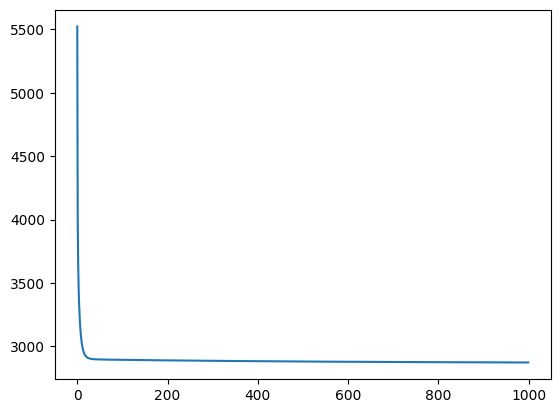

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# (10)test 데이터에 대한 성능 확인하기

In [17]:
# test 데이터에 대한 성능을 확인해 주세요
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2889.6818671571223

# (11)정답 데이터와 예측된 데이터 시각화하기

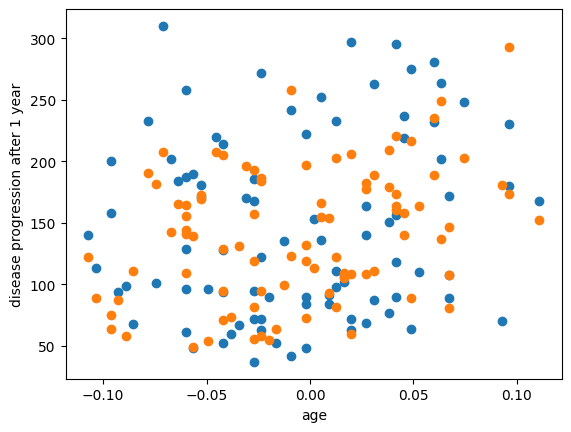

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.xlabel('age')
plt.ylabel('disease progression after 1 year')
plt.show()

# 회고  
## 어려웠던점  
- gradient함수 공식 유도에 대한 공부가 더 필요한것 같습니다.  
## 알아낸점  

## 아직모호한점  
- 데이터를 scatter로 뿌려본 결과 예측값이 중앙에 수렴하고 있지 않은것 같아서 제대로 예측한것인지 의문이 드네요  
- age값을 원래값으로 복구해서 뿌려야 하는데 어떻게 계산해야할지 잘 모르겠습니다.  
## 평가지표를 위해 시도한 것들  
- LEARNING_RATE를 1 에서 0.6으로 변경하였습니다.  
## 자기다짐  
- 표준 편차에 `n_samples`의 제곱근을 곱한 값을 원래 값으로 표현 하는 방법을 공부해야 할것 같습니다  